#### Load Libraries

In [83]:
# For load dataset

import yfinance as yf

In [84]:
# For Data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle warnings
import warnings
warnings.filterwarnings("ignore")

In [85]:
# ML Regression Models and Metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#### Load Dataset

In [86]:
# Download Apple Stock dataset from yfinance libarry
# Ticker of Apple stock is: APPL
ticker = 'AAPL'


data = yf.download(ticker, start='2018-01-01', end='2025-01-01')
data.columns = data.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed


In [87]:
# Now, we create pandas dataframe

# Input Features
features = data[['Open', 'High', 'Low', 'Volume']]

# Target: Shifted by -1 (Predicting tomorrow's price)
target = data['Close'].shift(-1)

# Create Dataframe
df = pd.concat([features, target], axis=1)
df.reset_index(inplace=True)

In [88]:
# Set Columns names
df.columns = ['Date','Open', 'High', 'Low', 'Volume', 'Target_Close']

#### Basic Information

In [89]:
# See the first 5 rows of the dataset
df.head()

,Date,Open,High,Low,Volume,Target_Close
0,2018-01-02,39.850084,40.351254,39.639309,102223600,40.334862
1,2018-01-03,40.405120,40.878189,40.271633,118071600,40.522217
2,2018-01-04,40.407462,40.625262,40.299735,89738400,40.983585
3,2018-01-05,40.618247,41.070235,40.526912,94640000,40.831345
4,2018-01-08,40.831345,41.126425,40.732981,82271200,40.826672


In [90]:
# See the last 5 rows of the dataset
df.tail()

,Date,Open,High,Low,Volume,Target_Close
1756,2024-12-24,254.339671,257.047410,254.140559,23234700,257.853760
1757,2024-12-26,257.027510,258.928914,256.470034,27237100,254.439209
1758,2024-12-27,256.669114,257.535222,251.920601,42355300,251.064484
1759,2024-12-30,251.094347,252.358634,249.621015,35557500,249.292511
1760,2024-12-31,251.303420,252.139635,248.306963,39480700,NaN


In [91]:
# Check the spae of the dataset
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 1761 rows and 6 columns.


In [92]:
# Get basic information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1761 non-null   datetime64[ns]
 1   Open          1761 non-null   float64       
 2   High          1761 non-null   float64       
 3   Low           1761 non-null   float64       
 4   Volume        1761 non-null   int64         
 5   Target_Close  1760 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 82.7 KB


In [93]:
# Check for missing values
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Volume          0
Target_Close    1
dtype: int64

In [94]:
# Fill missing values by mean imputation
df.fillna(df.mean(), inplace=True)

In [95]:
# Check for missing values again
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Volume          0
Target_Close    0
dtype: int64

In [96]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

In [97]:
# Get statistical summary of the dataset except date column
print(df.drop(columns=['Date']).describe())

              Open         High          Low        Volume  Target_Close
count  1761.000000  1761.000000  1761.000000  1.761000e+03   1761.000000
mean    121.728623   123.058895   120.504841  1.001417e+08    121.896673
std      59.046660    59.588055    58.556406  5.521309e+07     59.086406
min      34.225170    34.638783    33.754510  2.323470e+07     33.799675
25%      54.279309    54.796523    53.708092  6.309290e+07     54.264336
50%     131.890247   132.914813   130.062960  8.671200e+07    131.427231
75%     168.464867   170.209426   167.215933  1.214346e+08    168.652084
max     257.027510   258.928914   256.470034  4.265100e+08    257.853760


#### Univariate Analysis

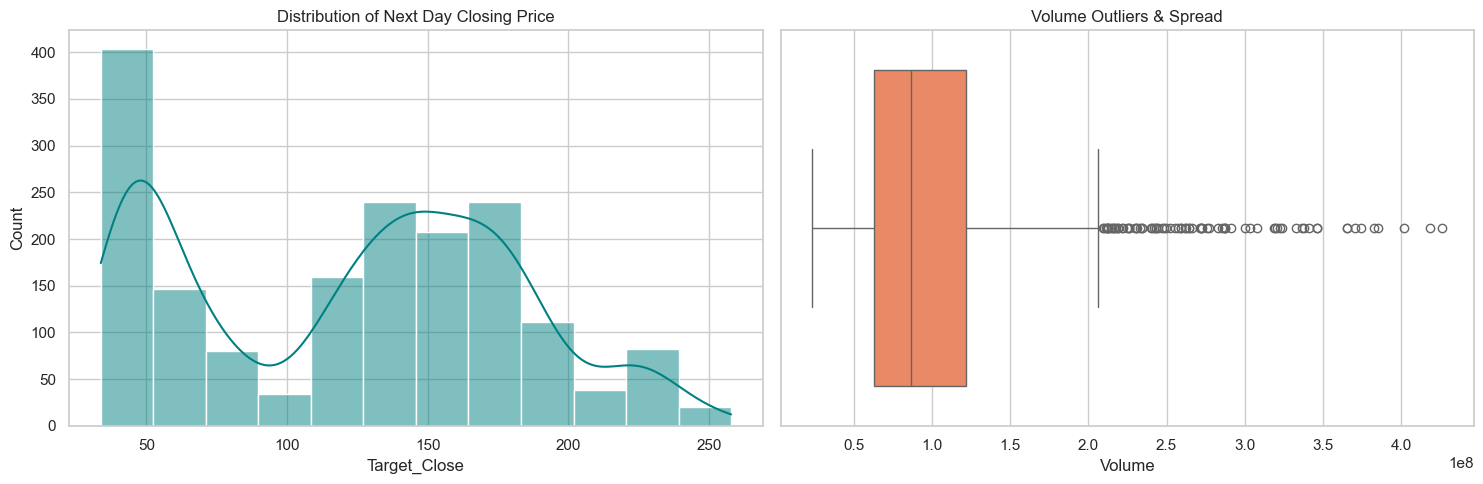

In [98]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of Target Close Price
sns.histplot(df['Target_Close'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Distribution of Next Day Closing Price')

# Boxplot of Volume to see outliers
sns.boxplot(x=df['Volume'], ax=axes[1], color='coral')
axes[1].set_title('Volume Outliers & Spread')

plt.tight_layout()
plt.show()

#### Bivariate and Multivariate Analysis

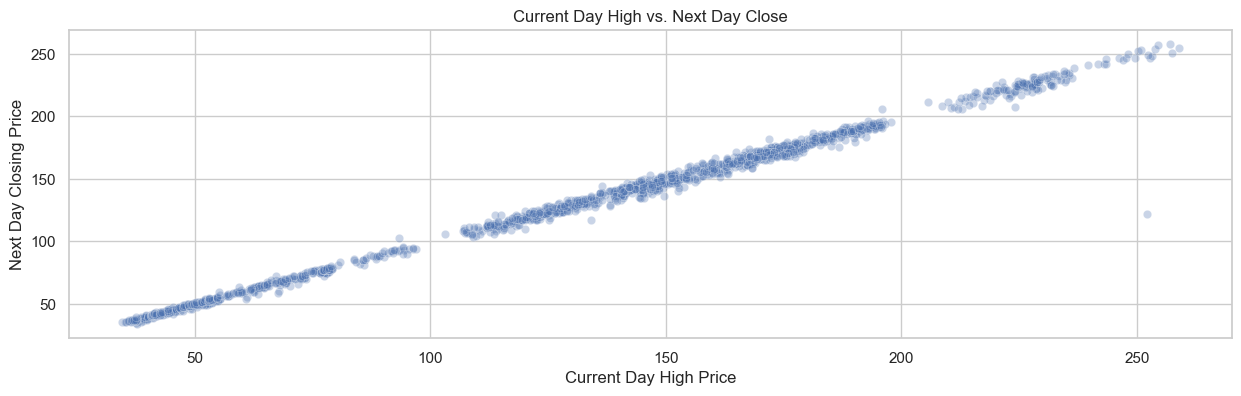

In [99]:
# Comparison between High Price and Next Day Close Price

plt.figure(figsize=(15, 4))
sns.scatterplot(data=df, x='High', y='Target_Close', alpha=0.3)
plt.title('Current Day High vs. Next Day Close')
plt.xlabel('Current Day High Price')
plt.ylabel('Next Day Closing Price')
plt.show()

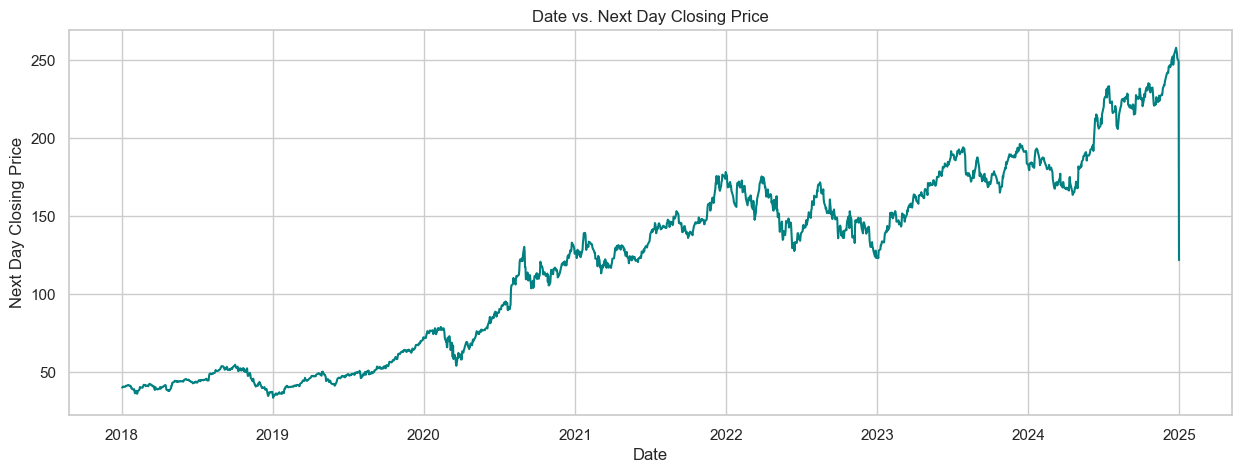

In [100]:
#Relation ship between Date and Target Close Price

plt.figure(figsize=(15, 5))

sns.lineplot(data=df, x='Date', y='Target_Close', color='teal')
plt.title('Date vs. Next Day Closing Price')
plt.xlabel('Date')
plt.ylabel('Next Day Closing Price')
plt.show()

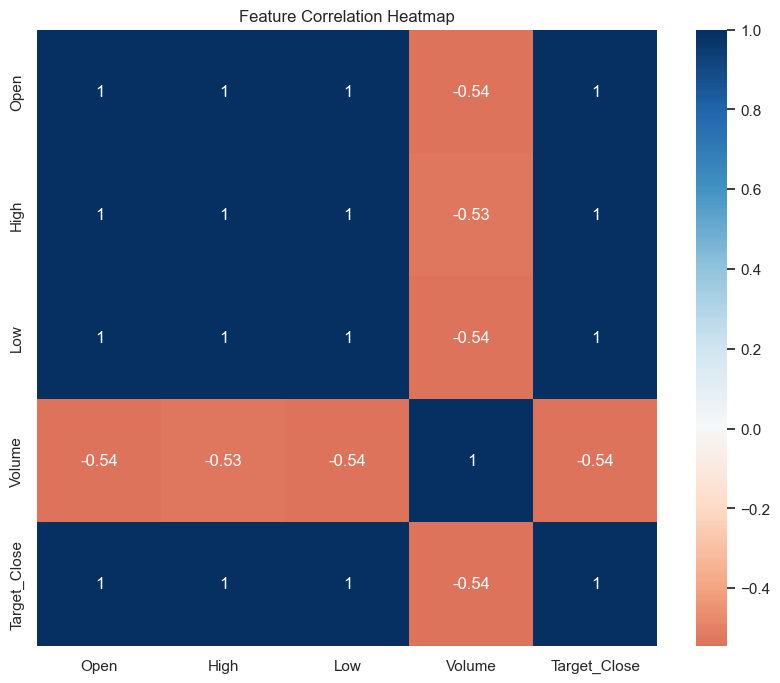

In [101]:
# Correlation Matrix

plt.figure(figsize=(10, 8))

# Ignore Data column for correlation
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

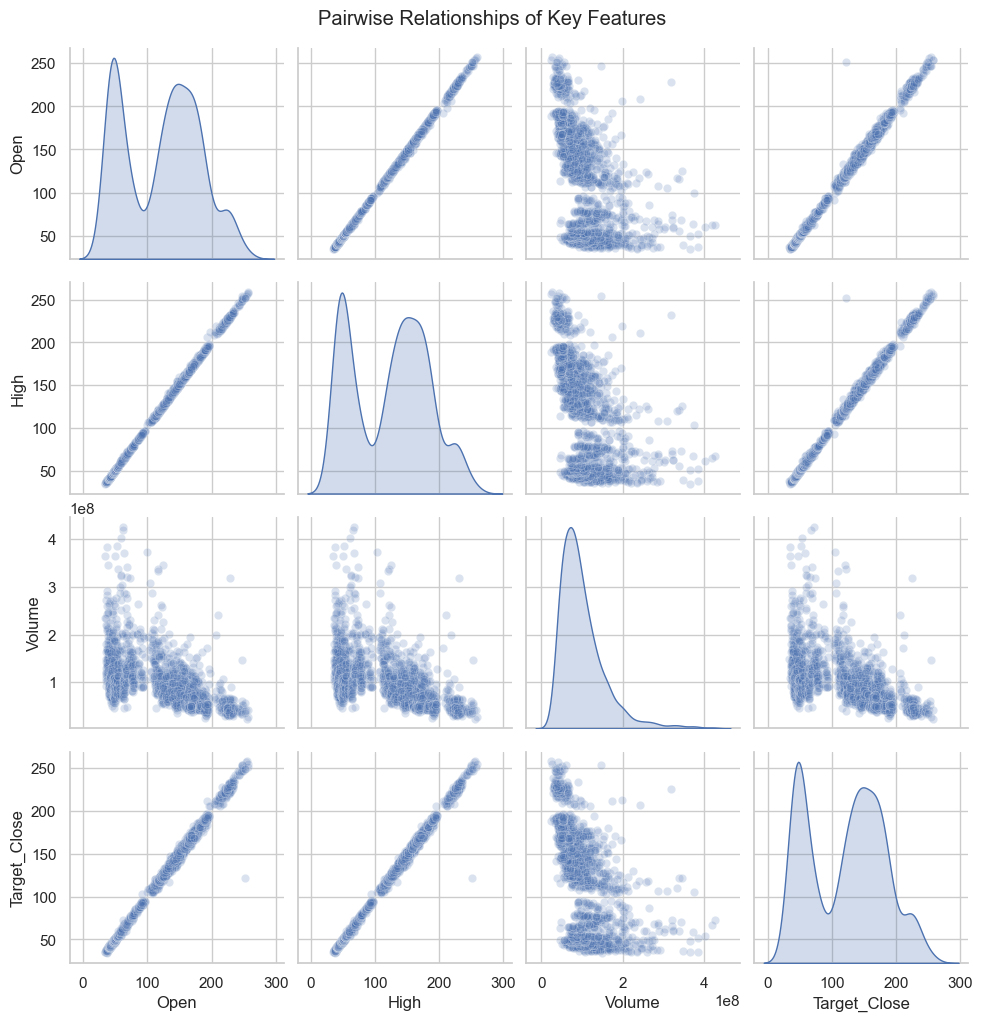

In [102]:
# Pairplot of selected features except(Date, Low)

sns.pairplot(df[['Open', 'High', 'Volume', 'Target_Close']], diag_kind='kde', plot_kws={'alpha': 0.2})
plt.suptitle('Pairwise Relationships of Key Features', y=1.02)
plt.show()

#### Model Training, Evaluation and Selection

In [103]:
# Seperate features and target variable

# We will drop the data column for modeling

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target_Close']

In [104]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [105]:
# Create an dictionary of regression models


models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5, min_samples_split=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

In [106]:
# Create a list for storing model performance results
results = []

In [107]:
# Create Model Evaluation Function

def models_evaluation(models, X_train, y_train, X_test, y_test):

    # Train models and evaluate one-by-one
    for name, model in models.items():

        # Model Training
        model.fit(X_train, y_train)

        # Model Prediction
        y_pred = model.predict(X_test)

        # Model Evaluation
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse) # RMSE is in actual Dollars
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        results.append({
            'Model Name': name,
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'R2 Score': round(r2, 4)
        })

In [108]:
# Train all models and evaluate them
models_evaluation(models, X_train, y_train, X_test, y_test)

In [109]:
# Create the table of Model Performances to select the best model

model_performance = pd.DataFrame(results).sort_values(by='RMSE')
model_performance

,Model Name,MAE,RMSE,R2 Score
0,Linear Regression,2.52,7.38,0.9143
6,XGBoost,15.43,23.46,0.1325
4,Gradient Boosting,15.54,23.78,0.1087
2,Decision Tree,15.98,23.95,0.0959
3,Random Forest,15.93,24.34,0.0662
5,AdaBoost,17.17,25.69,-0.0404
1,Support Vector Regressor,55.43,61.75,-5.0093


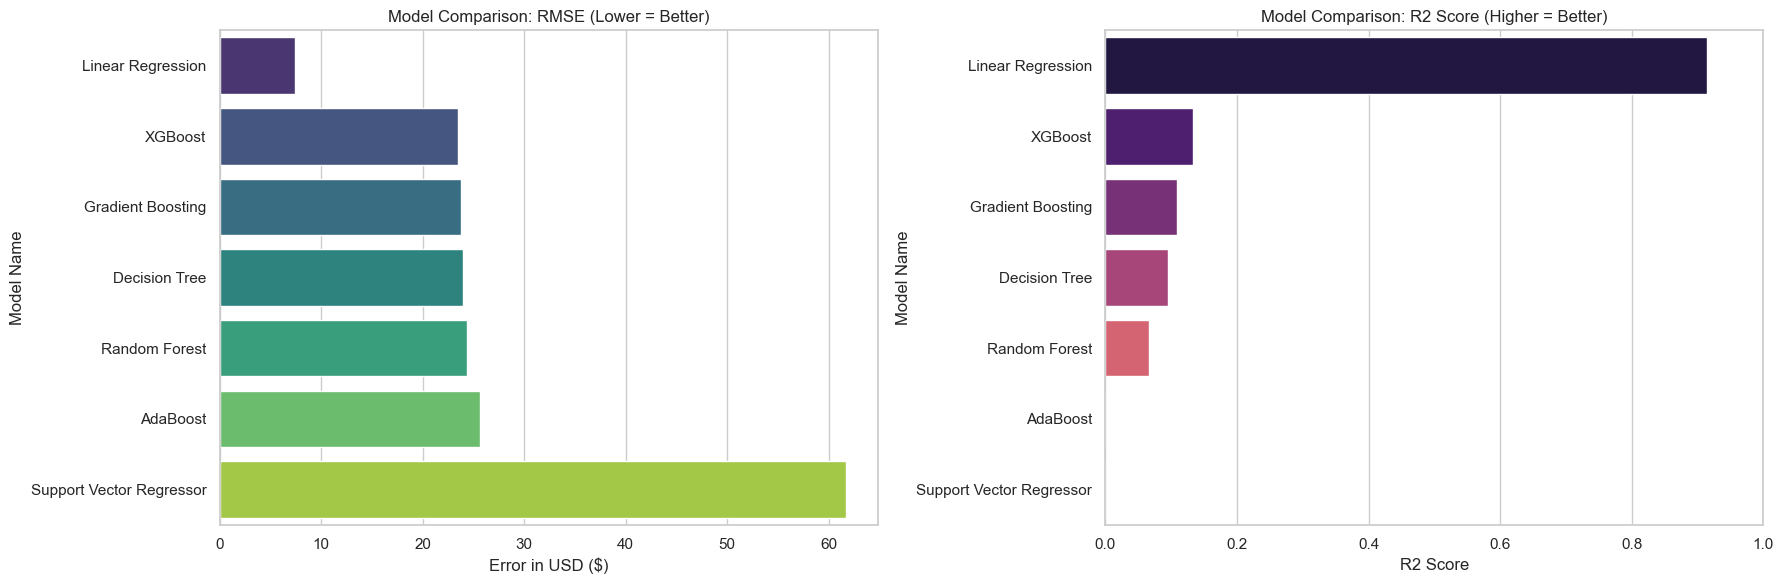

In [110]:
# Now, we compare RMSE and R2-Score for all models


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# RMSE Comparison (Lower is better)
sns.barplot(data=model_performance.sort_values('RMSE'), x='RMSE', y='Model Name', ax=axes[0], palette='viridis')
axes[0].set_title('Model Comparison: RMSE (Lower = Better)')
axes[0].set_xlabel('Error in USD ($)')

# R2 Score Comparison (Higher is better)
sns.barplot(data=model_performance.sort_values('R2 Score', ascending=False), x='R2 Score', y='Model Name', ax=axes[1], palette='magma')
axes[1].set_title('Model Comparison: R2 Score (Higher = Better)')
axes[1].set_xlim(0, 1.0)

plt.tight_layout()
plt.show()

### Summary

So, based on the evaluation metrics, we can select the best model for stock price prediction. The <b>Linear Regression</b> model appears to perform the best among the evaluated models, with the lowest RMSE(7.38) and highest R2 Score(0.9143).